# COMPARACIÓN DE ALGORITMO XGBOOST Y REGRESIÓN LINEAL

In [2]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 33 kB/s s eta 0:00:01    |█████████████▌                  | 66.2 MB 71.3 MB/s eta 0:00:02ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


**Librerías**

In [24]:
from numpy import mean, std
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random


**Definición de un dataset con solo 1 feature (1 variable X)**

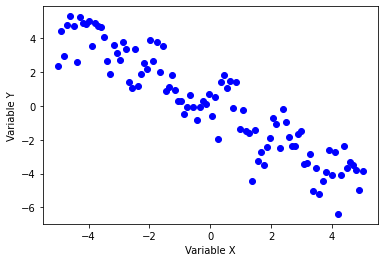

In [25]:
X = np.linspace (-5, 5, 100).reshape(100, 1)
y_limpia = np.sin(3* X) - X
y_ruido = np.random.normal(size = len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido
plt.scatter (X, y, color = "blue")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()


**División en dos datasets**

In [26]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 5)

**Obtención del mejor parámetro de profundidad del árbol entre 3 y 7 usando la validación cruzada y GridSearch**

In [27]:
regr = xgb.XGBRegressor ()

params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3,7]}

regr_opt = GridSearchCV(regr, params, cv = 3)

regr_opt.fit (X_train, y_train)

print ("Los mejores hiperparámetros son: {}".format(regr_opt.best_params_))

Los mejores hiperparámetros son: {'eta': 0.3, 'lambda': 1.0, 'max_depth': 3}


**Obtención de los coeficientes de determinación para medir el rendimiento**

In [28]:
y_train_pred = regr_opt.predict(X_train)

y_test_pred = regr_opt.predict(X_test)

print ("La R^2 en los datos de train es: {}".format(np.round(r2_score(y_train,
y_train_pred), 2)))

print ("La R^2 en los datos de test es: {}".format(np.round(r2_score(y_test,
y_test_pred), 2)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 0.8


**Representación gráfica**

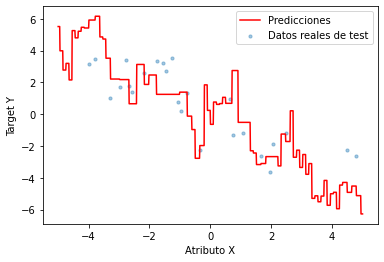

In [14]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000,1)

y_fit = regr_opt.predict(X_fit)

plt.scatter(X_test, y_test, label = "Datos reales de test", alpha = 0.4, s = 10)

plt.plot(X_fit, y_fit, c = "red", label = "Predicciones")

plt.legend ()

plt.xlabel("Atributo X")

plt.ylabel("Target Y")

plt.show ()

**Regresión lineal**

In [31]:
modelo = linear_model.LinearRegression()

modelo.fit(X_train, y_train)

y_train_pred_r = modelo.predict(X_train)

y_test_pred_r = modelo.predict(X_test)

**Obtención de los coeficientes de determinación para medir el rendimiento**

In [32]:
print (u'Estadístico R_2: %.2f' % r2_score(y_train, y_train_pred_r))

print (u'Estadístico R_2: %.2f' % r2_score(y_test, y_test_pred_r))

Estadístico R_2: 0.87
Estadístico R_2: 0.78
